In [1]:
import cv2
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
import pandas as pd
import keras
%matplotlib inline

Using TensorFlow backend.


In [2]:
from model import model
PRETRAINED_VGG = r"C:\Users\User\PycharmProjects\PlantPathology\logs\fit\20200502-223443VGG\weights_epoch_49-loss_0.06.hdf5"
# PRETRAINED_VGG = r"C:\Users\User\PycharmProjects\PlantPathology\logs\fit\20200502-223443VGG\weights_epoch_02-loss_1.33.hdf5"
PRETRAINED_VGG = r"C:\Users\User\PycharmProjects\PlantPathology\logs\fit\20200502-223443VGG\weights_epoch_49-loss_0.06.hdf5"
# PRETRAINED_VGG = r"C:\Users\User\PycharmProjects\PlantPathology\logs\fit\saved_weights\weights_epoch_121-loss_0.22.hdf5"
model.load_weights(PRETRAINED_VGG)

W0507 05:51:23.379044 12172 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4070: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [3]:
train_csv = r"C:\Users\User\PycharmProjects\PlantPathology\data\train.csv"
train_df = pd.read_csv(train_csv)#,index_col = 'image_id')
train_df.set_index('image_id',inplace = True)

In [4]:
def prepare_image(img_file):
    img = plt.imread(img_file)/255
    return cv2.resize(img,(163, 109))

In [5]:
n_images = 10
start = 0
data_set = 'Test'
images_range= (start,start + n_images)
imags = [r"C:\Users\User\PycharmProjects\PlantPathology\data\images\\" + f"{data_set}_{i}.jpg" for i in range(*images_range)]
p  = model.predict(np.array([prepare_image(img_file) for img_file in imags]))
# for pp in p:
#     print (pp)

W0507 05:51:41.795042 12172 deprecation_wrapper.py:119] From C:\Users\User\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



IndexError: index 200 is out of bounds for axis 0 with size 10

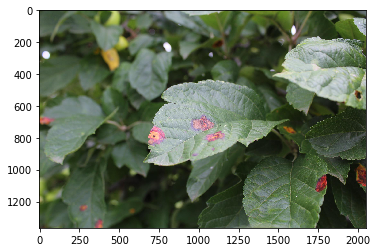

In [6]:
classes = 'healthy,multiple_diseases,rust,scab'.split(',')
acc = 0
# for i in range (*images_range):
for i in range (01,300):
    img = r"C:\Users\User\PycharmProjects\PlantPathology\data\images\\" + f"{data_set}_{i}.jpg"
    fig = plt.imshow(plt.imread(img))
    predicted = classes[np.argmax(p[i-images_range[0]])]
    #true = np.argmax(train_df.loc[f'Train_{i}'])
#     if predicted == true:
#         acc += 1
#     plt.title(f"Train_{i} - detected:{predicted} t:{true}")
    plt.title(f"Test_{i} - detected:{predicted}")
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    plt.suptitle(" - ".join([f'{p:.2f}' for p in p[i-images_range[0]]]))
    plt.show()
# print (f"accuracy = {acc*100/(images_range[1]-images_range[0]):.2f}")
    

In [210]:
classes = 'healthy,multiple_diseases,rust,scab'.split(',')
acc = 0
for i in range (*images_range):
    predicted = classes[np.argmax(p[i-images_range[0]])]
    true = np.argmax(train_df.loc[f'Train_{i}'])
    if predicted == true:
        acc += 1
print (f"accuracy = {acc*100/(images_range[1]-images_range[0]):.2f}")

accuracy = 62.00


In [225]:
trues = train_df.iloc[images_range[0]:images_range[1]].values
acc = keras.metrics.categorical_accuracy(trues,p)

In [227]:
with tf.Session() as sess:
    result_1 = sess.run(acc)
    print(acc)


Tensor("Cast_6:0", shape=(50,), dtype=float32)


In [232]:
x = tf.get_variable("x", dtype=tf.int32,  initializer=tf.constant([5]))
z = tf.get_variable("z", dtype=tf.int32,  initializer=tf.constant([6]))
c = tf.constant([5], name ="constant")
square = tf.constant([2], name ="square")
f = tf.multiply(x, z) + tf.pow(x, square) + z + c

In [307]:
submission = pd.DataFrame(p,index = [f"Test_{i}" for i in range(1821)],
        columns='healthy,multiple_diseases,rust,scab'.split(','),
                         )
submission.to_csv(r"C:\Users\User\PycharmProjects\PlantPathology\data\submission_05_04.csv",
                  index_label = 'image_id',
                 float_format='%.3f')

In [291]:
list(zip(p1,p2))

[(array([0., 0., 1., 0.], dtype=float32),
  array([0.00608817, 0.06676605, 0.9199872 , 0.00715851], dtype=float32)),
 (array([0., 0., 1., 0.], dtype=float32),
  array([4.6040094e-03, 1.8893573e-03, 9.9325669e-01, 2.4998200e-04],
        dtype=float32)),
 (array([0., 0., 0., 1.], dtype=float32),
  array([1.3056488e-05, 1.9903984e-03, 5.9131767e-06, 9.9799061e-01],
        dtype=float32)),
 (array([1., 0., 0., 0.], dtype=float32),
  array([9.9955577e-01, 3.6622791e-05, 1.5324613e-04, 2.5437601e-04],
        dtype=float32)),
 (array([0., 0., 1., 0.], dtype=float32),
  array([3.0464864e-06, 6.7001296e-05, 9.9992967e-01, 2.2724889e-07],
        dtype=float32)),
 (array([2.6732655e-14, 6.6685698e-06, 2.4303091e-19, 9.9999332e-01],
        dtype=float32),
  array([9.9484813e-01, 4.2678459e-04, 4.1636056e-03, 5.6146685e-04],
        dtype=float32)),
 (array([1., 0., 0., 0.], dtype=float32),
  array([9.9879754e-01, 6.6703506e-05, 1.0401387e-03, 9.5615993e-05],
        dtype=float32)),
 (array([